# Data Analysis

In this section we will have a look at the difference in products between hedonic and utilitarian dirven products. We will see if we can find any patterns in the data from a descriptive level and then move on to a more inferential level.

## Packages and Importing Data

In [1]:
# Installing packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk import bigrams
from wordcloud import WordCloud


In [35]:
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')


In [36]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [42]:
# Joining data for easier analyis 
data = pd.concat([data_hedonic, data_utilitarian])

# Functions for data analysis

In [37]:
# Putting df in a list
data_frames = [data_hedonic, data_utilitarian]

# Convert 'timestamp' column to datetime format for all DataFrames
for df in data_frames:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Printing converted timestamp
for i, df in enumerate(data_frames):
    print(f"DataFrame {i+1}:\n{df['timestamp'].dtype}\n")


DataFrame 1:
datetime64[ns]

DataFrame 2:
datetime64[ns]



/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_9134/1693643117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


In [38]:
# Rating and sentiment over time
def rating_and_sentiment_over_time(df, product_types):
    for product_type in product_types:
        # Filter data for the current product type
        product_data = df[df['product'] == product_type]
        
        # Group the data by timestamp and calculate the average rating for each time period
        average_rating_over_time = product_data.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

        # Group the data by timestamp and calculate the average sentiment score for each time period
        average_sentiment_over_time = product_data.groupby(pd.Grouper(key='timestamp', freq='M'))['sentiment'].mean()

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 6))
        color = 'tab:blue'
        ax.plot(average_rating_over_time.index, average_rating_over_time.values, label='Average Rating', color=color)
        ax.set_xlabel('Date')
        ax.set_ylabel('Average Rating', color=color)
        ax.tick_params(axis='y', labelcolor=color)
        ax.grid(True)
        
        # Set y-axis limit for average rating
        ax.set_ylim(0, 5)

        ax2 = ax.twinx()
        color = 'tab:red'
        ax2.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, label='Average Sentiment Score', color=color)
        ax2.set_ylabel('Average Sentiment Score', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Set y-axis limit for average sentiment score
        ax2.set_ylim(0, 5)

        fig.suptitle(f'Average Rating and Sentiment Over Time for {product_type}')
        fig.tight_layout()

        plt.show()

In [8]:
# Function for showing the amount on reviews by year

def rating_counts_by_year_with_product_types(df, product_types):
    for product_type in product_types:
        # Filter data for the current product type
        product_data = df[df['prod_type'] == product_type]

        # Extract the year from the timestamp
        product_data['year'] = product_data['timestamp'].dt.year

        # Map ratings to categories (1 and 2 as negative, 3 as neutral, 4 and 5 as positive)
        rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
        product_data['rating_category'] = product_data['rating'].map(rating_categories)

        # Group by year and rating category, then count the occurrences
        rating_counts_by_year = product_data.groupby(['year', 'rating_category']).size().unstack(fill_value=0)

        # Plot the stacked bar plot
        plt.figure(figsize=(10, 6))
        rating_counts_by_year.plot(kind='bar', stacked=True, color=['red', 'grey', 'green'], alpha=0.7)
        plt.title(f'Rating Distribution by Year for {product_type}')
        plt.xlabel('Year')
        plt.ylabel('Number of Ratings')
        plt.legend(title='Rating Category', loc='upper left')
        plt.grid(True)
        plt.show()


# 1. Sentiment Analysis

In [ ]:
# Showing sentiment distribution by year

def sentiment_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')
    plt.title('Distribution of Text Sentiment by Year')
    plt.xlabel('Year')
    plt.ylabel('Text Sentiment')
    plt.grid(True)
    plt.show()


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_9134/620456626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['timestamp'].dt.year
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_9134/620456626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')


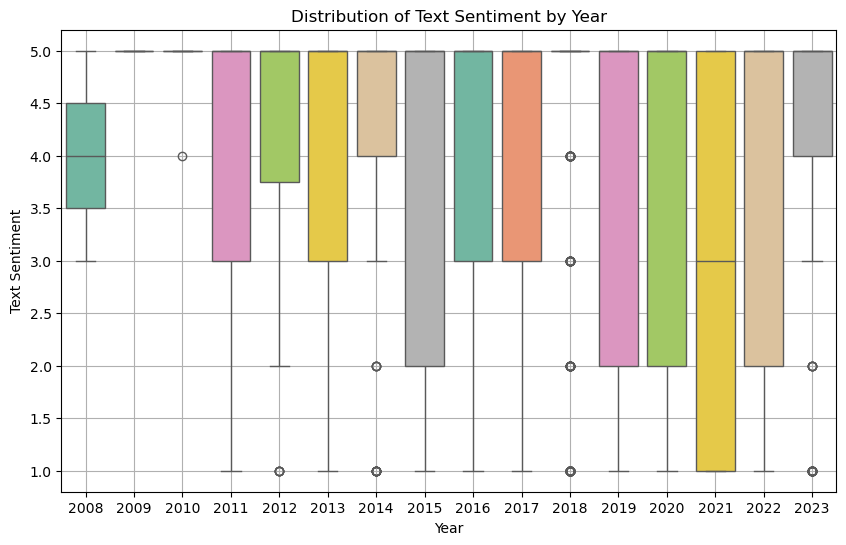

In [40]:
# # Showing boxplot of sentiment for utilitraian products
sentiment_by_year (data_hedonic)


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_9134/620456626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['timestamp'].dt.year
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_9134/620456626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')


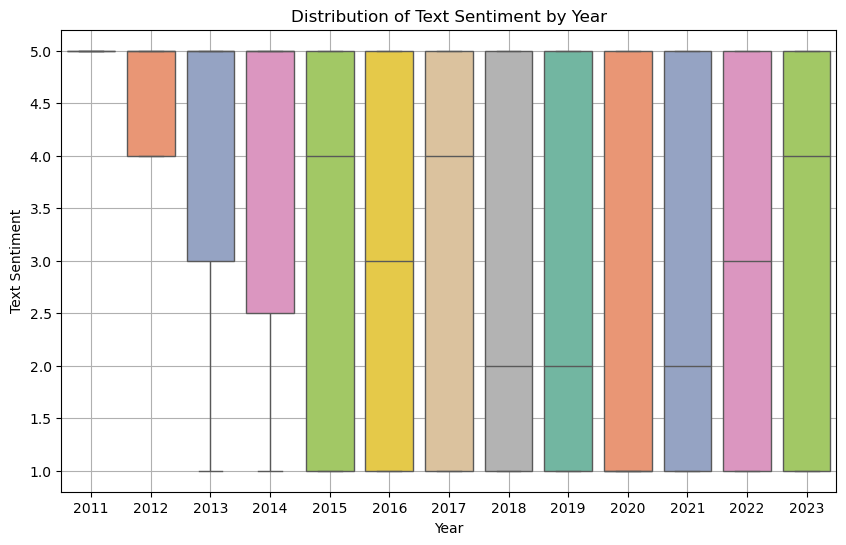

In [43]:
# Showing boxplot of sentiment for utilitraian products
sentiment_by_year (data_utilitarian)


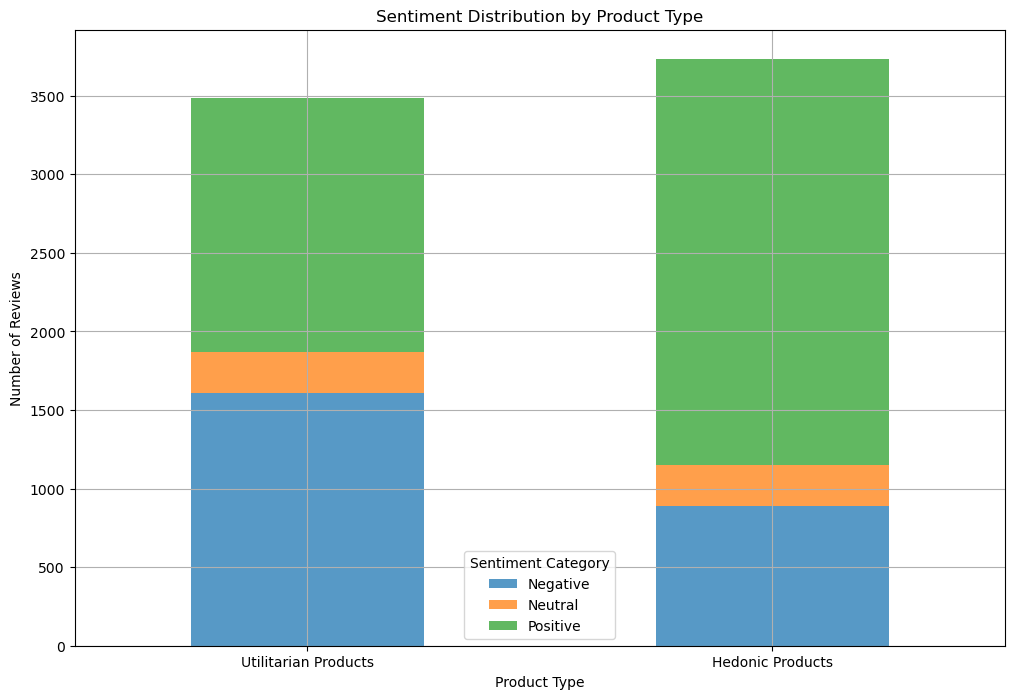

In [47]:
def plot_sentiment_distribution(df):
    # Define sentiment categories
    sentiment_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    
    # Map sentiment values to categories
    df['sentiment_category'] = df['sentiment'].map(sentiment_categories)

    # Group by product type and sentiment category, then count the occurrences
    sentiment_distribution = df.groupby(['prod_type', 'sentiment_category']).size().unstack(fill_value=0)

    # Plotting
    sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.75)
    plt.title('Sentiment Distribution by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel('Number of Reviews')
    plt.xticks(ticks=[0, 1], labels=['Utilitarian Products', 'Hedonic Products'], rotation=0)
    plt.legend(title='Sentiment Category')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming your DataFrame is named 'data_hedonic' and contains 'prod_type' and 'sentiment' columns
plot_sentiment_distribution(data)


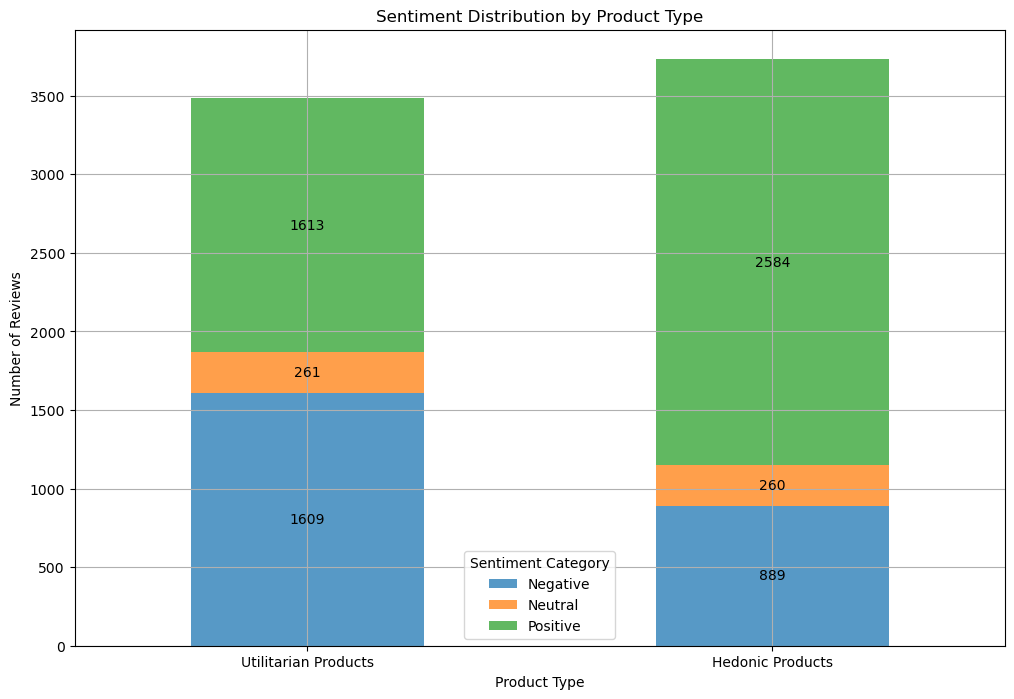

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentiment_distribution(df):
    # Define sentiment categories
    sentiment_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    
    # Map sentiment values to categories
    df['sentiment_category'] = df['sentiment'].map(sentiment_categories)

    # Group by product type and sentiment category, then count the occurrences
    sentiment_distribution = df.groupby(['prod_type', 'sentiment_category']).size().unstack(fill_value=0)

    # Plotting
    ax = sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.75)
    
    # Add percentages inside each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width / 2, y + height / 2, f'{height:.0f}', ha='center', va='center', fontsize=10, color='black')

    plt.title('Sentiment Distribution by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel('Number of Reviews')
    plt.xticks(ticks=[0, 1], labels=['Utilitarian Products', 'Hedonic Products'], rotation=0)
    plt.legend(title='Sentiment Category')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming your DataFrame is named 'data' and contains 'prod_type' and 'sentiment' columns
plot_sentiment_distribution(data)



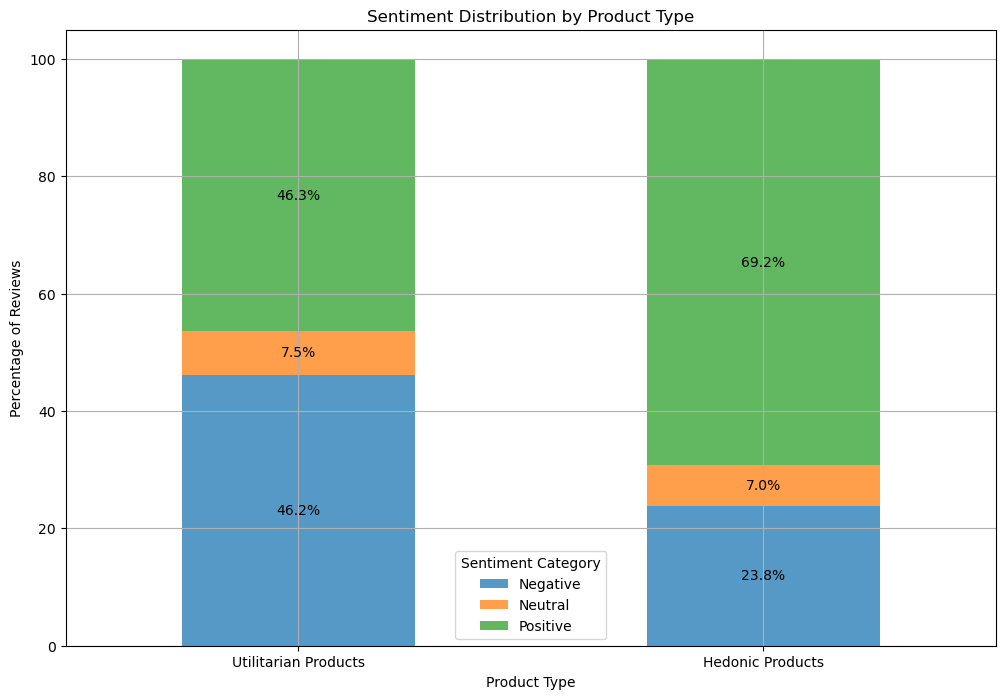

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentiment_distribution(df):
    """
    Plot the sentiment distribution grouped by product type with percentages inside each bar plot.

    Parameters:
        df (DataFrame): The DataFrame containing review data.
                        It must have columns 'prod_type' and 'sentiment'.
    """
    # Define sentiment categories
    sentiment_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    
    # Map sentiment values to categories
    df['sentiment_category'] = df['sentiment'].map(sentiment_categories)

    # Group by product type and sentiment category, then count the occurrences
    sentiment_distribution = df.groupby(['prod_type', 'sentiment_category']).size().unstack(fill_value=0)

    # Calculate percentages
    sentiment_distribution_percent = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

    # Plotting
    ax = sentiment_distribution_percent.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.75)
    
    # Add percentages inside each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

    plt.title('Sentiment Distribution by Product Type')
    plt.xlabel('Product Type')
    plt.ylabel('Percentage of Reviews')
    plt.xticks(ticks=[0, 1], labels=['Utilitarian Products', 'Hedonic Products'], rotation=0)
    plt.legend(title='Sentiment Category')
    plt.grid(True)
    plt.show()


plot_sentiment_distribution(data)


In [ ]:
# Analysis of review sentiment by hedonic and utilitarian products


## 3. Text Analysis Wordclouds 

In [41]:
# Generating Wordclouds

def generate_wordcloud_reviews_by_sentiment(df):
    # Define rating categories
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Iterate over each sentiment category
    for ax, sentiment in zip(axes.flatten(), ['Negative', 'Neutral', 'Positive']):
        # Filter out reviews based on sentiment
        reviews = df[df['rating'].map(rating_categories) == sentiment]
        
        # Drop rows where 'text_cleaned1' column contains NaN values
        reviews.dropna(subset=['text_cleaned1'], inplace=True)
        
        # Concatenate the cleaned text of reviews
        text = ' '.join(reviews['text_cleaned1'])

        # Generate bigrams from the text
        bigram_list = list(bigrams(text.split()))

        # Create a WordCloud object with bigrams
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(bigram_list))

        # Plot the WordCloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Word Cloud of {sentiment} Reviews (Bigrams)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()